## Challenge 1

Nous utilisons le générateur de nombres aléatoires "numpy.random.normal" de la librairie Python (Generate pseudo-random numbers, Lib/random.py) afin de créer un histogramme (en bleu). Nous comparons ensuite cet histogramme avec la distribution gaussienne donnée analytiquement (en rouge). Enfin, la méthode de rejet de Von Neumann produit un ensemble de nombres suivant une distribution spécifique voulue (une gaussienne dans ce cas, en orange) en partant d'une distribution initiale (par exemple une exponentielle).


En guise d'exemple, afin de montrer que les trois méthodes citées ci-dessus donnent les mêmes résultats, nous avons pris une gaussienne de moyenne 0 et d'écart-type 1.


Pour la méthode de Von Neumann, nous commençons à partir de la densité $f(x)$ suivante [1]:

$$
f(x) = \frac{2}{\sqrt{2 \pi}}e^{-\frac{x^2}{2}},
$$

et nous choisissons une densité exponentielle $g(x)$:

$$
g(x) = e^{-x},
$$
où nous avons choisi $\alpha = 1$.

Définissons $h(x) = \frac{f(x)}{g(x)}$. Nous obtenons

$$
h(x)= \sqrt{\frac{2}{\pi}}e^{x-\frac{x^2}{2}}.
$$
Nous cherchons ensuite le maximum de la fonction $h(x)$: 

$$
h'(x)= \sqrt{\frac{2}{\pi}}e^{x-\frac{x^2}{2}}(1-x) = 0 \Rightarrow x = 1.
$$

La constante $K$ est ensuite calculée de la manière suivante:

$$
K = \frac{f(1)}{g(1)} = \sqrt{\frac{2 e}{\pi}} = 1.31.
$$

In [30]:
from matplotlib import pyplot
import numpy
import random
from random import gauss
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

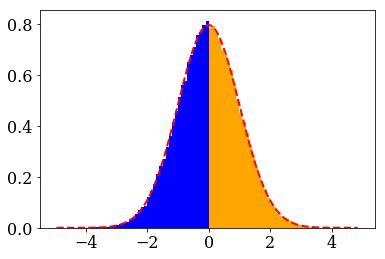

In [8]:
mu=0      # valeur moyenne de la gaussienne
sigma = 1 # écart-type de la gaussienne
b=[]      # liste vide dans laquelle on va placer les nombres générés 
          # aléatoirement sur base d'une distribution gaussienne

h=[]      # liste vide utilisée pour la méthode de Von Neumann
N = 100000
K = 1.3
binwidth=0.1

for i in range (1,100000):
    j = numpy.random.normal(mu, sigma)
    b.append(j)

# Histogramme
bins=numpy.arange(-5.,0.1, binwidth)
pyplot.hist(b,bins,density=True,color='blue')

# Méthode de Von Neumann
for i in range(N):
    u1 = numpy.random.random_sample()
    
    # On distribue g selon une exponentielle
    g = numpy.log(1/(1-u1))
    
    # on génère un deuxième nombre aléatoire pour la condition de rejet
    u2 = numpy.random.random_sample()
    
    # condition de rejet
    term1=2*numpy.exp(-g**2/2.0)/numpy.sqrt(2*numpy.pi)
    term2=(K*numpy.exp(-g))
    ratio = term1/term2
    if (u2<ratio):
        h.append(g)

pyplot.hist(h,bins=numpy.arange(0.,5., binwidth),density=True,color='orange')

# On ajoute à l'histogramme la fonction analytique
bins=numpy.arange(-5,5., binwidth)
xc = bins[:-1] + binwidth/2
fct=2*numpy.exp(-xc**2/2.0)/numpy.sqrt(2*numpy.pi)
pyplot.plot(xc,fct,'r--',color='red',linewidth=2)

Les trois méthodes utilisées donnent donc les mêmes résultats.

Faisons de même pour la distribution exponentielle. Nous utilisons cette fois-ci le générateur "random.expovariate" afin de créer cette distribution. Nous la comparons ensuite avec la courbe obtenue grâce à l'expression analytique de la distribution:

$$
p(x)=
\begin{cases} 
\alpha e^{-\alpha x} &\mbox{si } x\geq 0 \\
0 &\mbox{si } x<0
\end{cases} 
$$

où $\alpha > 0$ est un paramètre.

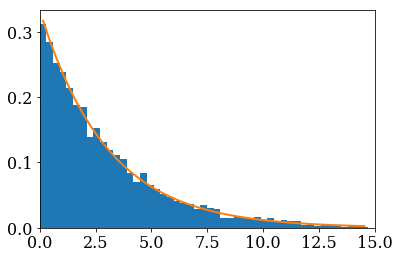

In [47]:
beta=3
a=[]
for i in range (1,5000):
    exp = random.expovariate(1/beta)
    a.append(exp)
    
# on trace l'histogramme
binwidth=0.3
pyplot.xlim(0,15)
bins=numpy.arange(0.,15, binwidth)
pyplot.hist(a,bins,density=True);

# on ajoute à l'histogramme la fonction analytique
xc = bins[:-1] + binwidth/2
pyplot.plot(xc,(1/beta)*numpy.exp(-(1/beta)*xc), lw=2)

Représentons sur un autre histogramme la méthode de Von Neumann, en utilisant cette fois-ci la méthode "numpy.extract":

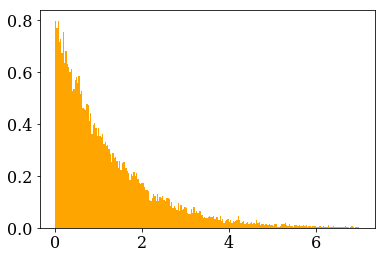

In [64]:
N = 1000000
# On distribue g selon une distribution uniforme
g = numpy.random.uniform(0,10,N)

# probabilité que g soit uniformément distribué
p_g_unif = numpy.random.uniform(0,10,N)

# probabilité que g soit distribué selon une exponentielle
p_g_exp = numpy.exp(-g)

# On tire un deuxième nombre selon une distribution uniforme pour la condition de rejet
uniform2 = numpy.random.random_sample(N)

# condition de rejet
condition = uniform2 < p_g_exp / (2*p_g_unif)

# on extrait les nombres satisfaisant à la condition
h = numpy.extract(condition,g)

# on trace l'histrogramme
binwidth=0.03
bins=numpy.arange(0.,7, binwidth)
pyplot.hist(h,bins,density='true',color='orange');

Nous obtenons donc une distribution exponentielle avec les trois méthodes. 

## Challenge 2

Nous allons à présent implémenter l'algorithme de Box-Muller [2] permettant de générer des nombres aléatoires distribués selon une gaussienne. Pour cela, nous commençons d'abord par une description de l'algorithme.

Supposons que $u1$ et $u2$ sont deux variables indépendantes distribuées uniformément dans l'intervalle [0,1]. Posons

$$
z1 = \sqrt{-2 \mbox{ln}(u1)} \mbox{cos}(2 \pi u2)
$$

$$
z2 = \sqrt{-2 \mbox{ln}(u1)} \mbox{sin}(2 \pi u2)
$$

Alors $z1$ et $z2$ sont deux gaussiennes de moyenne nulle et de variance 1. 

Vérifions cela comme suit.

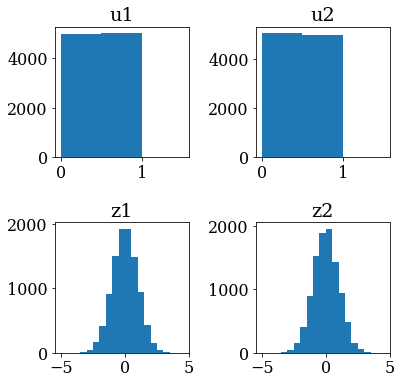

In [68]:
from numpy import random, sqrt, log, sin, cos, pi
from pylab import show,hist,subplot,figure

# u1 et u2 sont uniformément distribués entre 0 et 1
u1 = random.rand(10000)
u2 = random.rand(10000)

# on définit la fonction qui va transformer u1 et u2 en z1 et z2 distribués selon une normale
def gaussian(u1,u2):
    z1 = sqrt(-2*log(u1))*cos(2*pi*u2)
    z2 = sqrt(-2*log(u1))*sin(2*pi*u2)
    return z1,z2

# on applique la fonction "gaussian" à u1 et u2
z1,z2 = gaussian(u1,u2)

# on trace les histogrammes 
binwidth=0.5
bins1=numpy.arange(0,2, binwidth)
bins2=numpy.arange(-5,5, binwidth)

f = plt.figure(figsize=(6,6))
f.subplots_adjust(hspace=0.5, wspace=0.5)
ax1 = f.add_subplot(221)
ax2 = f.add_subplot(222)
ax3 = f.add_subplot(223)
ax4 = f.add_subplot(224)

ax1.hist(u1, bins1)
ax2.hist(u2, bins1)
ax3.hist(z1, bins2)
ax4.hist(z2, bins2)

ax1.title.set_text('u1')
ax2.title.set_text('u2')
ax3.title.set_text('z1')
ax4.title.set_text('z2')

Comme attendu, les histrogrammes de $u1$ et $u2$ sont des distributions uniformes entre 0 et 1, et les histogrammes de $z1$ et $z2$ en dessous sont des distributions gaussiennes. Nous concluons donc que l'algorithme de Box-Muller génère des nombres aléatoires distribués selon une normale à partir de nombres aléatoires uniformément distribués.

Références:

[1]  http://www.columbia.edu/~ks20/4703-Sigman/4703-07-Notes-ARM.pdf

[2]  https://glowingpython.blogspot.com/2013/01/box-muller-transformation.html